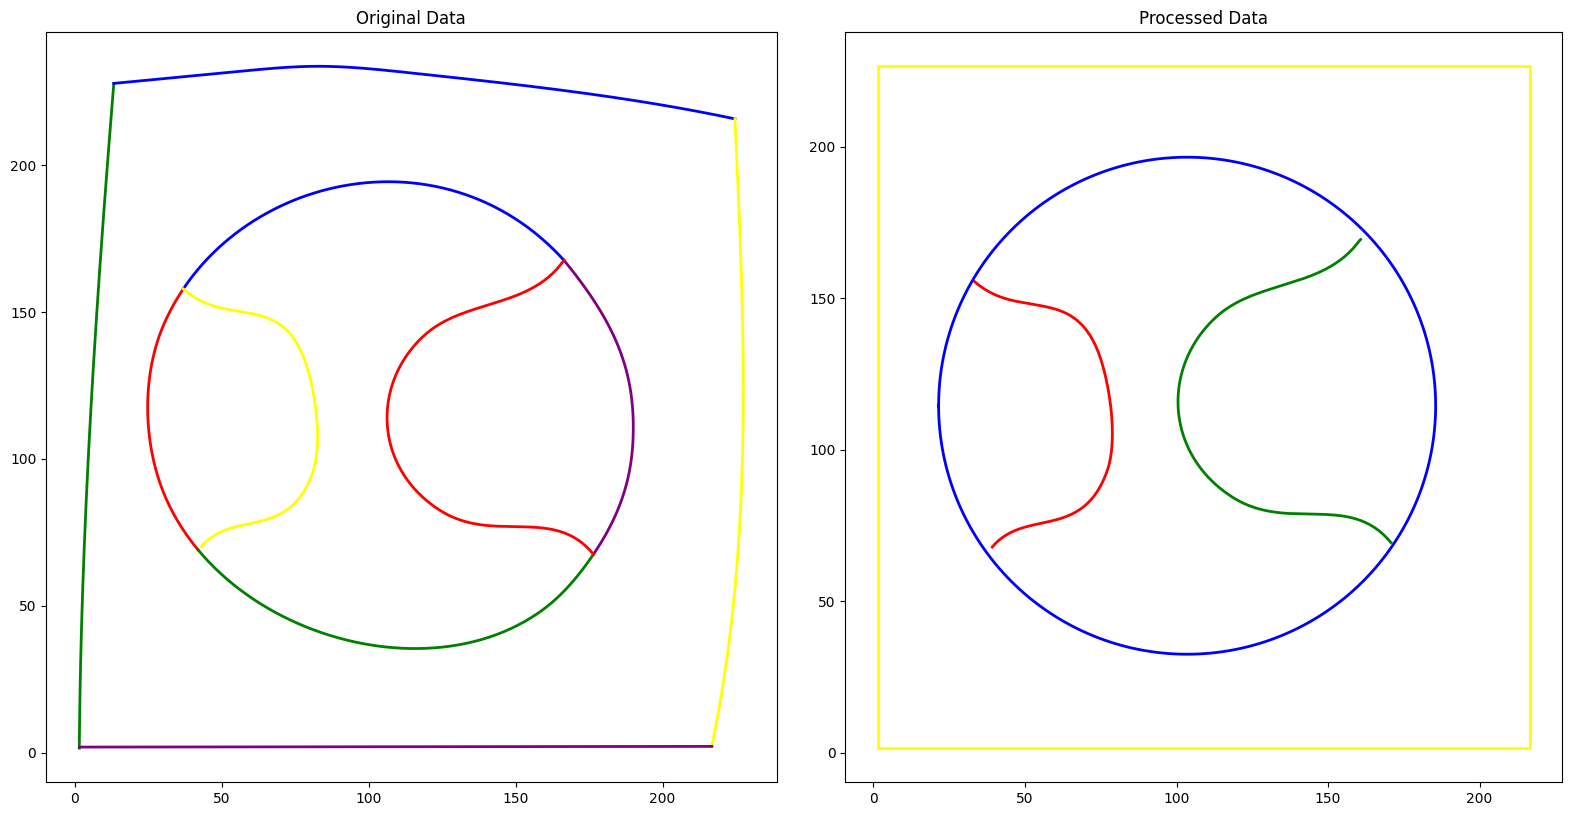

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']  # Define some colors for plotting
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            # print("Xy - ", XY)
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

# Read and process the CSV files
csv_path1 = "problems/frag0.csv"
csv_path2 = "problems/frag01_sol.csv"

output_data1 = read_csv_(csv_path1)
output_data2 = read_csv_(csv_path2)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

In [2]:
# print(output_data1) 
# Data too large to imagine 

blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
blue  =  open_curve
red  =  circle
purple  =  complex


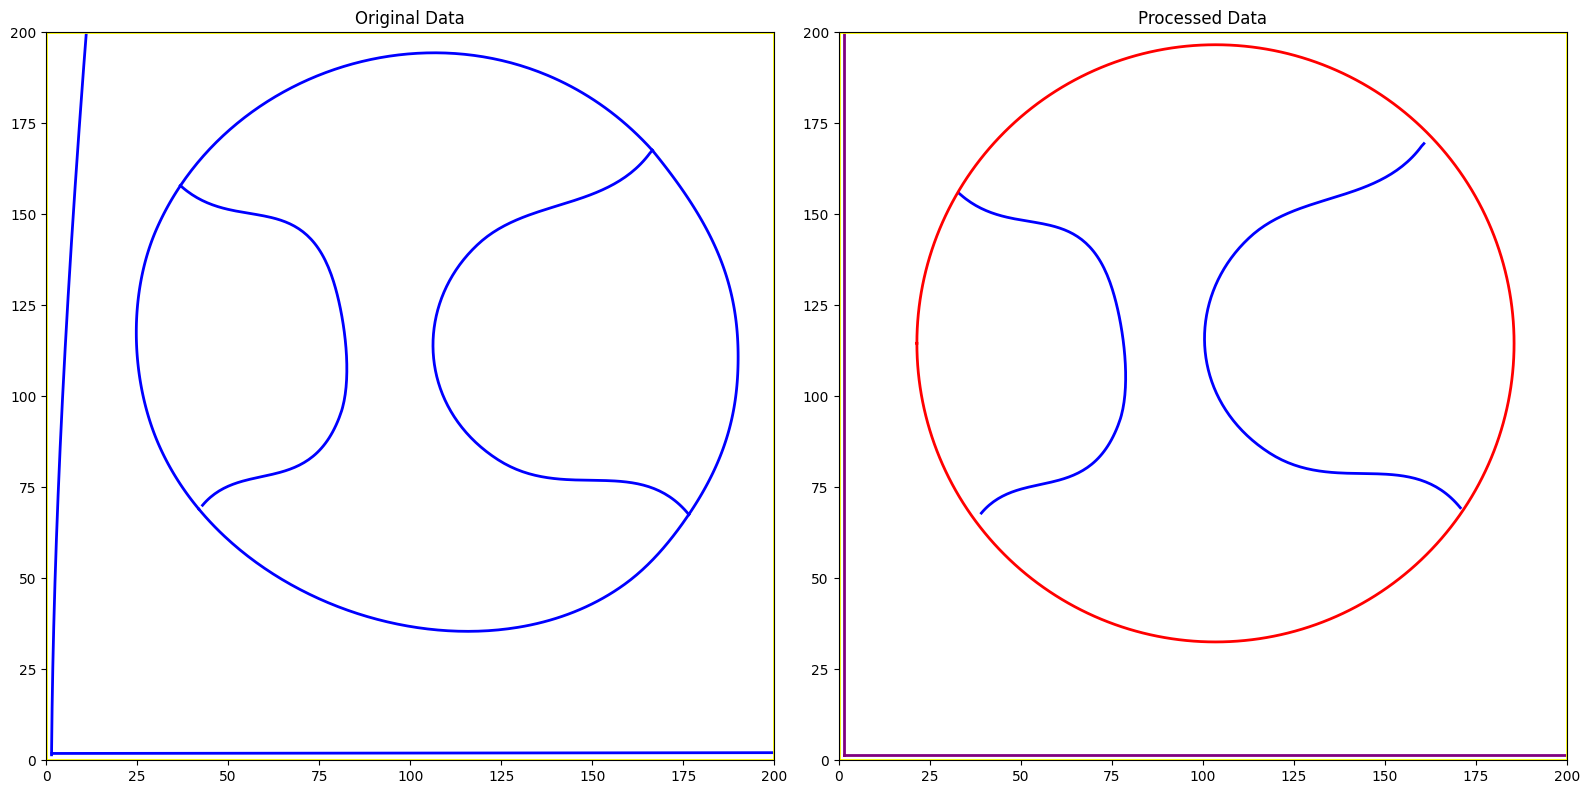

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def identify_shape(XY):
    # Check if the shape is closed
    is_closed = np.allclose(XY[0], XY[-1])
    
    # Calculate the area using the shoelace formula
    area = 0.5 * np.abs(np.dot(XY[:, 0], np.roll(XY[:, 1], 1)) - np.dot(XY[:, 1], np.roll(XY[:, 0], 1)))
    
    # Calculate convex hull
    hull = ConvexHull(XY)
    hull_area = hull.area
    
    # Calculate circularity
    perimeter = np.sum(np.sqrt(np.sum(np.diff(XY, axis=0)**2, axis=1)))
    circularity = 4 * np.pi * area / (perimeter**2) if perimeter > 0 else 0
    
    if not is_closed:
        return 'open_curve'
    elif circularity > 0.9:  # Threshold for circle-like shapes
        return 'circle'
    elif np.isclose(area, hull_area, rtol=1e-2):  # Check if shape is convex
        return 'convex'
    else:
        return 'complex'

def plot(paths_XYs, title, ax):
    color_map = {
        'open_curve': 'blue',
        'circle': 'red',
        'convex': 'green',
        'complex': 'purple'
    }
    
    for XYs in paths_XYs:
        for XY in XYs:
            shape = identify_shape(XY)
            color = color_map[shape]
            ax.plot(XY[:, 0], XY[:, 1], c=color, linewidth=2)
    
    # Add yellow border
    ax.plot([0, 200, 200, 0, 0], [0, 0, 200, 200, 0], c='yellow', linewidth=2)
    
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 200)

# Read and process the CSV files
csv_path1 = "problems/frag0.csv"
csv_path2 = "problems/frag01_sol.csv"

output_data1 = read_csv_(csv_path1)
output_data2 = read_csv_(csv_path2)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 3)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1237284519  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _maxoutside  0


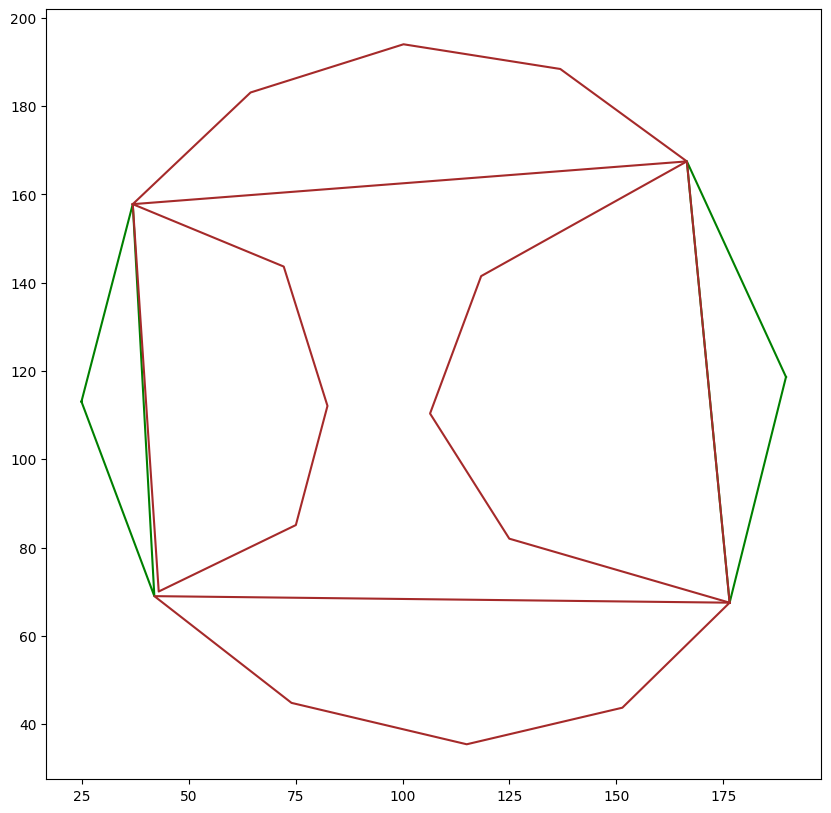

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
from shapely.geometry import Polygon, LineString
from shapely.ops import polygonize

def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def simplify_shape(XY, epsilon=5):
    # Simplify the shape using Ramer-Douglas-Peucker algorithm
    line = LineString(XY)
    simplified = line.simplify(epsilon, preserve_topology=False)
    return np.array(simplified.coords)

def fit_circle(XY):
    # Fit a circle to the points
    center = np.mean(XY, axis=0)
    radius = np.mean(np.linalg.norm(XY - center, axis=1))
    return center, radius

def identify_simplified_shape(XY):
    hull = ConvexHull(XY)
    hull_points = XY[hull.vertices]
    
    # Check if it's approximately a circle
    center, radius = fit_circle(XY)
    max_deviation = np.max(np.abs(np.linalg.norm(XY - center, axis=1) - radius))
    if max_deviation < 0.1 * radius:
        return 'circle', None
    
    # Determine the number of sides
    n_sides = len(hull_points)
    
    if n_sides == 3:
        return 'triangle', hull_points
    elif n_sides == 4:
        # Check if it's a square or rectangle
        edges = np.diff(hull_points, axis=0, append=hull_points[:1])
        edge_lengths = np.linalg.norm(edges, axis=1)
        if np.allclose(edge_lengths, edge_lengths[0], rtol=0.1):
            return 'square', hull_points
        else:
            return 'rectangle', hull_points
    elif n_sides > 4:
        return 'polygon', hull_points
    else:
        return 'line', XY

def plot_shapes(paths_XYs, title, ax):
    color_map = {
        'line': 'blue',
        'circle': 'red',
        'triangle': 'green',
        'square': 'purple',
        'rectangle': 'orange',
        'polygon': 'brown'
    }
    
    for XYs in paths_XYs:
        for XY in XYs:
            simplified_XY = simplify_shape(XY)
            shape, points = identify_simplified_shape(simplified_XY)
            color = color_map[shape]
            
            if shape == 'circle':
                center, radius = fit_circle(simplified_XY)
                circle = plt.Circle(center, radius, fill=False, color=color)
                ax.add_artist(circle)
            elif shape == 'line':
                ax.plot(points[:, 0], points[:, 1], color=color)
            else:
                polygon = Polygon(points)
                x, y = polygon.exterior.xy
                ax.plot(x, y, color=color)
    
    # Add yellow border
    ax.plot([0, 200, 200, 0, 0], [0, 0, 200, 200, 0], c='yellow', linewidth=2)
    
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 200)

# Read and process the CSV file
csv_path1 = "problems/frag0.csv"
output_data1 = read_csv_(csv_path1)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
plot_shapes(output_data1, 'Simplified Shapes', ax)
plt.show()